In [38]:
from sklearn.datasets import load_iris
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import numpy as np



In [30]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

In [60]:
# Load in our dataset
iris = load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [53]:
X = iris.data[:, [0,1]]
y = iris.target
n_classes = 3

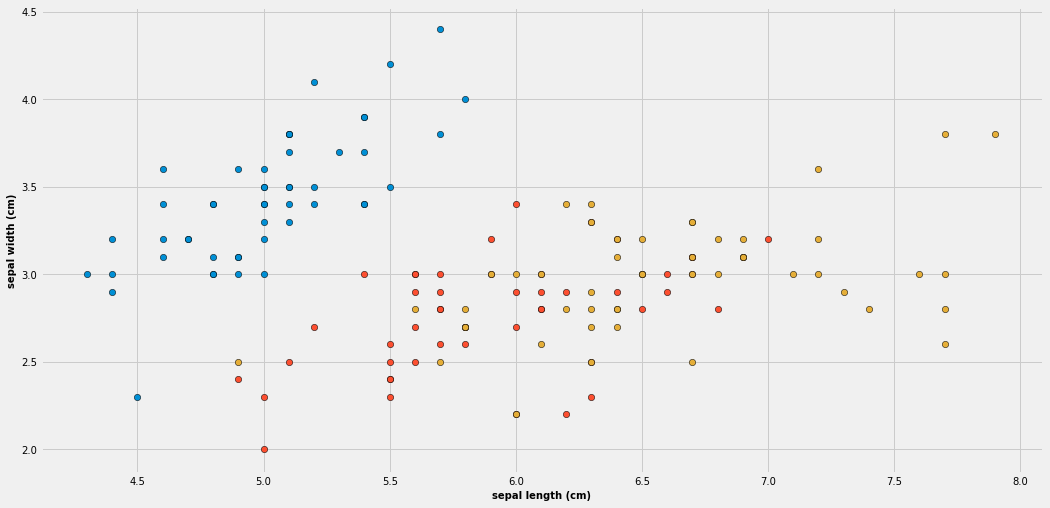

In [62]:
fig = plt.figure(figsize=(16,8))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

for i, c in zip(range(n_classes), colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=c, edgecolors='k', s=40, label=iris.target_names[i],cmap=cmap)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [156]:
depth = 3
crit = 'entropy'
split = 'best'
min_leaf = 0.2
min_split = 0.1

clf = tree.DecisionTreeClassifier(random_state = 0 
      , criterion = crit
      , splitter = split
      , max_depth = depth
      , min_samples_split=min_split
      , min_samples_leaf=min_leaf)

# Train our decision tree (tree induction + pruning)
clf = clf.fit(X, y)

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names[0:2],  
                     class_names=iris.target_names,  
                     filled=True, rounded=True, 
                     impurity = False,
                    proportion = True,
                     special_characters=True)  
graph = graphviz.Source(dot_data)

In [157]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if feature %s <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

print(feature)
print(threshold)

node=0 test node: go to node 1 if feature 0 <= 5.549999952316284 else to node 2.
	node=1 leaf node.
	node=2 test node: go to node 3 if feature 0 <= 6.1499998569488525 else to node 4.
		node=3 leaf node.
		node=4 leaf node.

[ 0 -2  0 -2 -2]
[ 5.54999995 -2.          6.14999986 -2.         -2.        ]


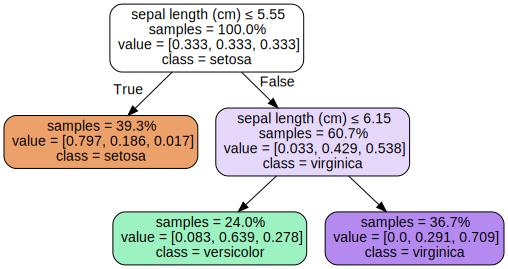

In [158]:
display(SVG(graph.pipe(format='svg')))

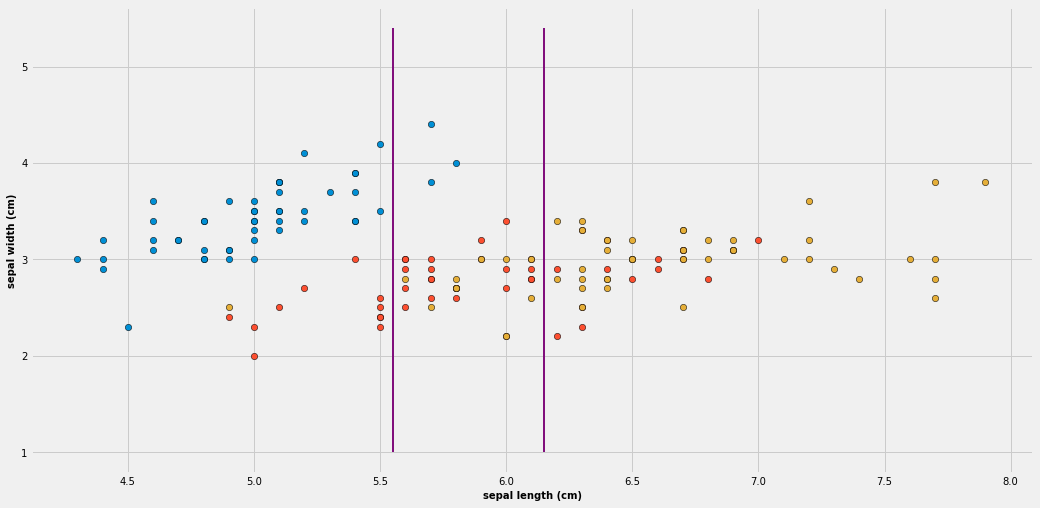

In [160]:
fig = plt.figure(figsize=(16,8))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

for i, c in zip(range(n_classes), colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=c, edgecolors='k', s=40, label=iris.target_names[i],cmap=cmap)
plt.vlines(x=threshold[0], color=colors[5], ymin=y_min, ymax=y_max)
#plt.hlines(y=threshold[1], color=colors[5], xmin=x_min, xmax=threshold[0])
plt.vlines(x=threshold[2], color=colors[5], ymin=y_min, ymax=y_max)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

In [125]:
X.shape

(150, 2)

In [161]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [162]:
tree.plot_tree(clf.fit(iris.data, iris.target)) 

AttributeError: module 'sklearn.tree' has no attribute 'plot_tree'